# NewsMood

In [1]:
# Dependencies
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
# API keys
import api_keys

# Initialize Sentiment Analyzer 
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = api_keys.consumer_key
consumer_secret = api_keys.consumer_secret
access_token = api_keys.access_token
access_token_secret = api_keys.access_token_secret

In [2]:
#prepare api keys for call 
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
jsonreader = tweepy.parsers.JSONParser()
api = tweepy.API(auth, parser=jsonreader)

# enter the twitter handles for the desired News Sources
news_source = ["FoxNews", "CNN", "BBCWorld", "CBSNews", "nytimes"]

## Grab Tweets

In [3]:
# make empty dictionary into which the data with be appended
tweets_dict = {
    "tweet_source": [],
    "tweet_text": [],
    "tweet_date": [],
    "tweet_vader_score": [],
    "tweet_neg_score": [],
    "tweet_pos_score": [],
    "tweet_neu_score": []
}

#loop through 5 pages for each News Source (where x = page number);
#at 20 tweets per page, this will yield 100 tweets per source
for x in range(5):

    # loop through news_source list
    for source in news_source:

        #call the API
        tweets = api.user_timeline(source, page=x)

        # for each of the 20 tweets in each call, append them to the tweets_dict
        for tweet in tweets:
            tweets_dict["tweet_source"].append(tweet["user"]["name"])
            tweets_dict["tweet_text"].append(tweet["text"])
            tweets_dict["tweet_date"].append(tweet["created_at"])
            #set up vader variable
            runvader = analyzer.polarity_scores(tweet["text"])
            #run vader to produce sentiment values
            tweets_dict["tweet_vader_score"].append(runvader["compound"])
            tweets_dict["tweet_pos_score"].append(runvader["pos"])
            tweets_dict["tweet_neu_score"].append(runvader["neu"])
            tweets_dict["tweet_neg_score"].append(runvader["neg"])

#convert to dataframe
df = pd.DataFrame(tweets_dict, columns=["tweet_source", 
                                             "tweet_text", 
                                             "tweet_date",
                                             "tweet_vader_score",
                                             "tweet_pos_score",
                                             "tweet_neu_score",
                                             "tweet_neg_score"])

# export csv in case (eliminates need to rerun the api call, which may take time)
df.to_csv(f"{datetime.now()}-tweets.csv", encoding="utf-8")
df

,tweet_source,tweet_text,tweet_date,tweet_vader_score,tweet_pos_score,tweet_neu_score,tweet_neg_score
0,Fox News,BREAKING: Federal appeals court rules against ...,Thu Nov 08 19:18:44 +0000 2018,0.0000,0.000,1.000,0.000
1,Fox News,Breaking News: Grand jury indicts captain of M...,Thu Nov 08 17:02:25 +0000 2018,-0.6124,0.115,0.615,0.269
2,Fox News,JUST IN: Police identify gunman who opened fir...,Thu Nov 08 15:14:45 +0000 2018,-0.7783,0.000,0.638,0.362
3,Fox News,JUST IN: Supreme Court Justice Ruth Bader Gins...,Thu Nov 08 14:22:51 +0000 2018,0.7906,0.389,0.611,0.000
4,Fox News,Sgt. Ron Helus was fatally shot when he respon...,Thu Nov 08 13:43:25 +0000 2018,-0.6369,0.000,0.833,0.167
5,Fox News,Tom Homan: “It’s a tragedy each and every time...,Thu Nov 08 13:35:03 +0000 2018,-0.6597,0.000,0.672,0.328
6,Fox News,People walk away from the scene in Thousand Oa...,Thu Nov 08 13:22:27 +0000 2018,-0.3400,0.000,0.862,0.138
7,Fox News,Teylor Whittler describes what she witnessed a...,Thu Nov 08 12:56:20 +0000 2018,0.0000,0.000,1.000,0.000
8,Fox News,An FBI agent talks to a potential witness as t...,Thu Nov 08 12:37:05 +0000 2018,0.0000,0.000,1.000,0.000
9,Fox News,Ventura County Fire Department Captain Stan Zi...,Thu Nov 08 12:25:14 +0000 2018,-0.3400,0.000,0.870,0.130


In [4]:
# Count the total number of tweets; make sure all columns are equally populated
df.count()

tweet_source         460
tweet_text           460
tweet_date           460
tweet_vader_score    460
tweet_pos_score      460
tweet_neu_score      460
tweet_neg_score      460
dtype: int64

In [5]:
# Convert dates (currently strings) into datetimes
df["tweet_date"] = pd.to_datetime(df["tweet_date"])

# Sort the dataframe by date
df.sort_values("tweet_date", inplace=True)
df.reset_index(drop=True, inplace=True)

# Preview the data to confirm data is sorted
df.head()

,tweet_source,tweet_text,tweet_date,tweet_vader_score,tweet_pos_score,tweet_neu_score,tweet_neg_score
0,Fox News,McDonald's customers’ $5M lawsuit over unwante...,2018-11-08 03:01:47+00:00,-0.4215,0.000,0.743,0.257
1,Fox News,Woman finds her diamond before proposal and 'r...,2018-11-08 03:04:00+00:00,-0.0772,0.170,0.638,0.191
2,Fox News,.@senatemajldr Mitch McConnell said Wednesday ...,2018-11-08 03:11:00+00:00,0.4939,0.158,0.842,0.000
3,Fox News,Surveillance video shows Michigan woman report...,2018-11-08 03:16:01+00:00,0.0000,0.000,1.000,0.000
4,Fox News,"Democrat Colin Allred, who unseated Rep. Pete ...",2018-11-08 03:23:00+00:00,0.0000,0.000,1.000,0.000


# Visualizations

In [6]:
# check the source names
df["tweet_source"].unique()

array(['Fox News', 'BBC News (World)', 'The New York Times', 'CNN',
       'CBS News'], dtype=object)

In [7]:
#create lists to hold variables for scatter and bar plots
sources = ["BBC News (World)", "CBS News", "CNN", "Fox News", "The New York Times"]
colors = ["yellow", "grey", "red", "orange", "blue"]
labels = ["BBC", "CBS", "CNN", "FOX", "NYT"]

## Sentiment Scatter Plot

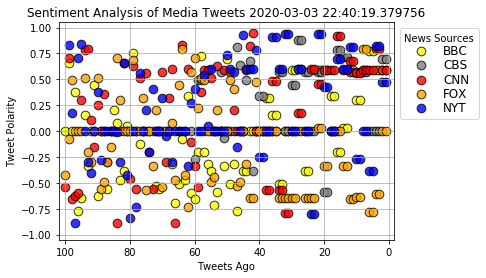

In [8]:
#create plot function to graph each line according to source and with unique colors 
def plotter(i):
    plt.scatter(np.arange(-len(df[df["tweet_source"] == sources[i]]), 0, 1), 
                df[df["tweet_source"] == sources[i]]["tweet_vader_score"],
                edgecolor="black", linewidths=1, marker="o", color=colors[i], s=75,
                alpha=0.8, label=labels[i])
# execute
j = 0
while j < 5:
    plotter(j)
    j = j +1

#set up the point labels, tickmarks, plot limits, axis labels, gridstyling 
plt.title(f"Sentiment Analysis of Media Tweets {datetime.now()}")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.xlim([-102, 1.5])
plt.xticks([-100, -80, -60, -40, -20, 0], [100, 80, 60, 40, 20, 0])
plt.ylim([-1.05, 1.05])
plt.grid(True)

# make legend
lgnd = plt.legend(fontsize="large", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", bbox_to_anchor=(1,1), title="News Sources", 
                  labelspacing=0.1)

# save plot to folder
plt.savefig("Fig1.png", bbox_extra_artists=(lgnd, ), bbox_inches='tight')

# output scatterplot
plt.show()

## Overall Sentiment Bar Graph

In [9]:
# Average all polarities by news source
polarity_df = df.groupby(["tweet_source"]).mean()["tweet_vader_score"]

# View the polarities
pd.DataFrame(polarity_df)

,tweet_vader_score
tweet_source,
BBC News (World),0.032181
CBS News,0.285874
CNN,0.197784
Fox News,-0.116200
The New York Times,0.195574


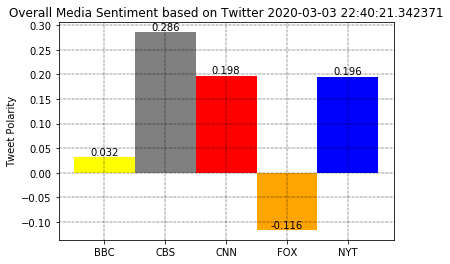

In [10]:
# hold tweet_vader_score values in a tuple
vader_tuple = (polarity_df["BBC News (World)"], 
                            polarity_df["CBS News"], 
                            polarity_df["CNN"], 
                            polarity_df["Fox News"],
                            polarity_df["The New York Times"])

#generate the bars accoring to average tweet_vader_score
fig, ax = plt.subplots()
ind = np.arange(len(vader_tuple))  
width = 1
bartuple = []
i = 0
while i < 5:
    bartuple.append(ax.bar(ind[i], vader_tuple[i], width, color=colors[i]))
    i = i + 1
_bar1 = bartuple[0]
_bar2 = bartuple[1]
_bar3 = bartuple[2]
_bar4 = bartuple[3]
_bar5 = bartuple[4]

# build label-maker for each News source
def labeler(_bars):
    # attach some text labels
    for _bar in _bars:
        height = _bar.get_height()
        ax.text(_bar.get_x() + _bar.get_width()/2., 1*height,
                f'{round(float(height),3)}',
                ha='center', va='bottom')
#execute labeler
labeler(_bar1)
labeler(_bar2)
labeler(_bar3)
labeler(_bar4)
labeler(_bar5)

#set up the bar labels, tickmarks, axis labels, gridstyling 
ax.set_ylabel("Tweet Polarity")
ax.set_title(f"Overall Media Sentiment based on Twitter {datetime.now()}")
ax.set_xticks(ind + .0)
ax.set_xticklabels(labels)
ax.set_autoscaley_on(True)
ax.grid(color='black', linestyle='-.', linewidth=0.4)

# save graph to folder
plt.savefig("Fig2.png")

# output bargraph
fig.show()